In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [52]:
df = pd.read_csv(r"C:\Users\User\Desktop\DA\Data-Analysis\Python Customer Segmentation\Mall_Customers.csv")

In [53]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
24,25,Female,54,28,14
62,63,Female,67,47,52
126,127,Male,43,71,35
137,138,Male,32,73,73
192,193,Male,33,113,8
135,136,Female,29,73,88
26,27,Female,45,28,32
104,105,Male,49,62,56
141,142,Male,32,75,93
144,145,Male,25,77,12


#### Summary Stats

In [54]:
df.shape

(200, 5)

In [55]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
df.describe().round()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


###### Renaming columns

In [57]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [58]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome','Spending Score (1-100)':'SpendingScore' }, inplace=True)

In [59]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [60]:
columns = df.columns.to_list()
columns

['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

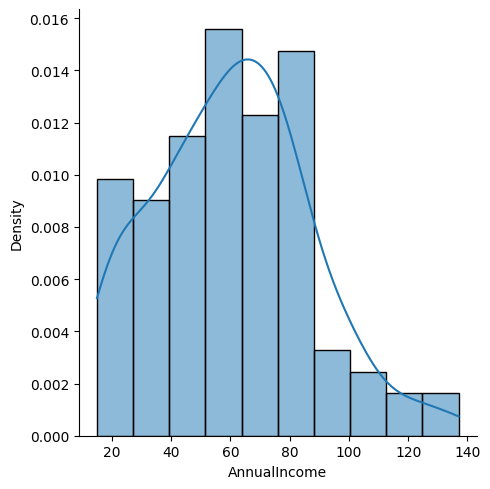

In [61]:
sns.displot(df['AnnualIncome'], stat='density',kde=True)

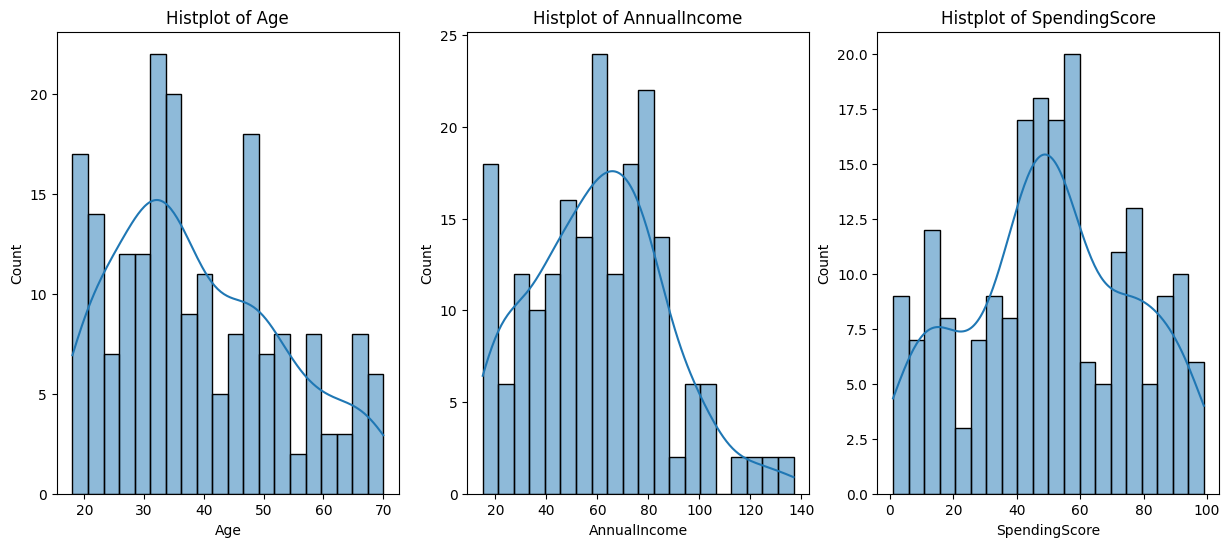

In [92]:
# histplot

plt.figure(1 , figsize = (15 , 6))
n = 0 
for i in ['Age','AnnualIncome','SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    # plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(data=df[i] , bins = 20, kde=True)
    plt.title('Histplot of {}'.format(i))
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

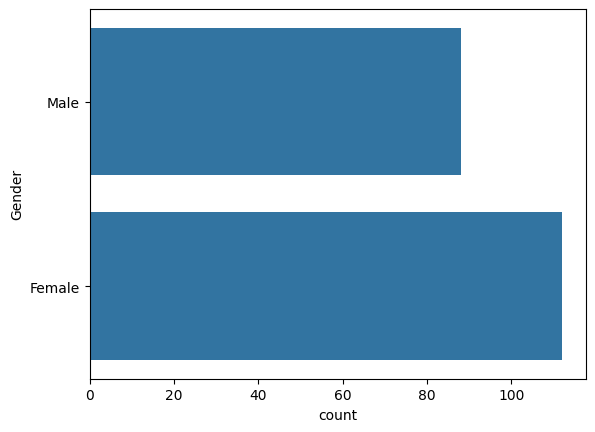

In [63]:
sns.countplot(data=df,y='Gender')


In [64]:
columns

['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [65]:
columns2 = columns[1:]
columns2

['Age', 'AnnualIncome', 'SpendingScore']

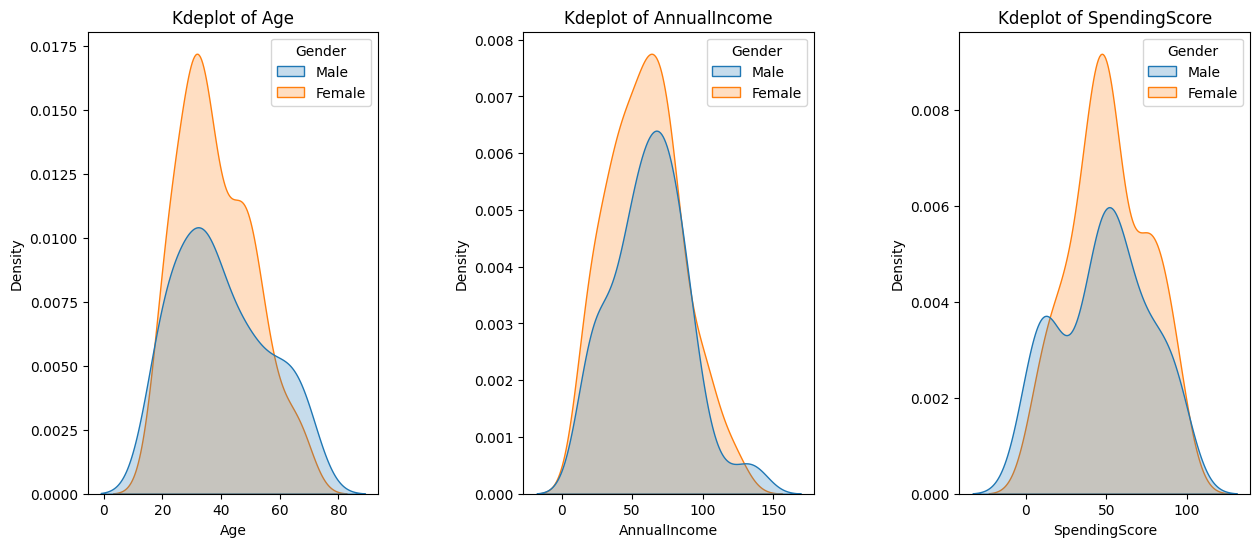

In [66]:
# kdeplot

plt.figure(1 , figsize = (15 , 6))
n = 0 
for i in columns2: #columns2 is a list of all columns except Gender and CustomerID
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.kdeplot(data=df,fill=True,hue='Gender',x=i)
    plt.title('Kdeplot of {}'.format(i))
plt.show()

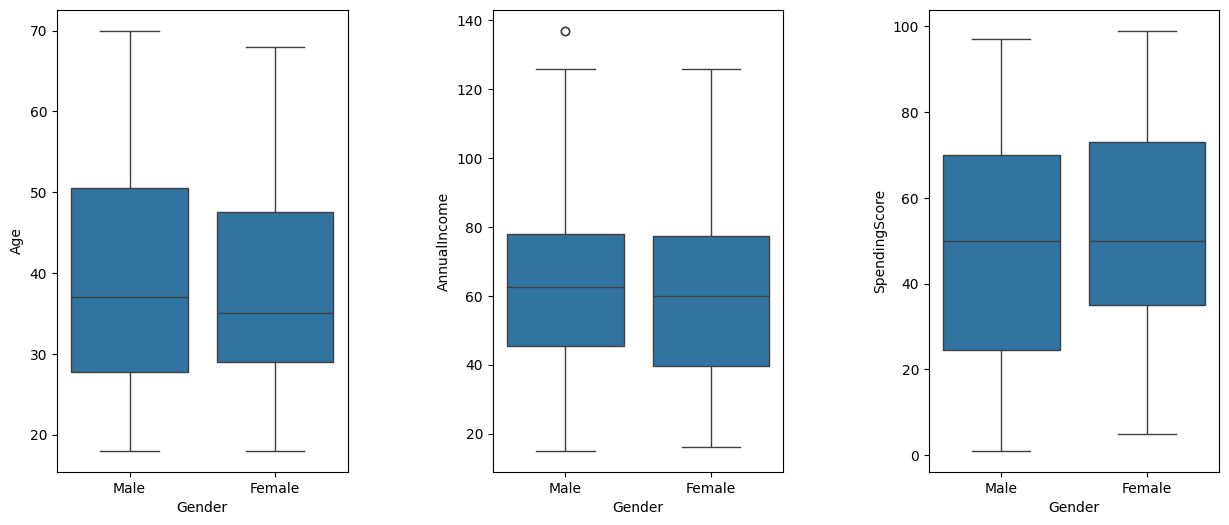

In [67]:
# boxplot 

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in columns2:
    n+=1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace= 0.5 , wspace= 0.5)
    sns.boxplot(data=df,x='Gender',y=df[x],legend='brief')

#### Clustering

In [68]:
# clustering based on Annual Income

clustering = KMeans(n_clusters=6)
clustering.fit(df[['AnnualIncome']])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [69]:
clustering.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4])

In [70]:
# appending cluster labels to df
df['Income Cluster'] = clustering.labels_
df.head(5)

,Gender,Age,AnnualIncome,SpendingScore,Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [71]:
# basic analysis
df['Income Cluster'].value_counts()

Income Cluster
1    46
5    44
0    42
3    32
2    28
4     8
Name: count, dtype: int64

In [72]:
# finding optimal amount of clusters to use
# using the elbow method

clustering.inertia_

5081.484660267268

In [73]:
# inertia measures how well a dataset was clustered by KMeans
inertia_scores = []
for i in range(1,11):
    kmeans =  KMeans(n_clusters=i)
    kmeans.fit(df[['AnnualIncome']])
    inertia_scores.append(kmeans.inertia_)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

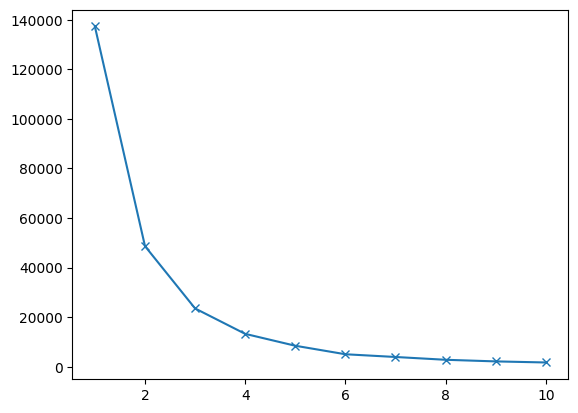

In [74]:
# optimal number of clusters from graph is 3
plt.plot(range(1,11),inertia_scores,marker='x')

In [75]:
# changing n_clusters to 3
clustering = KMeans(n_clusters=3)
clustering.fit(df[['AnnualIncome']])
df['IncomeCluster'] = clustering.labels_
df['IncomeCluster'].value_counts()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IncomeCluster
1    90
2    74
0    36
Name: count, dtype: int64

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

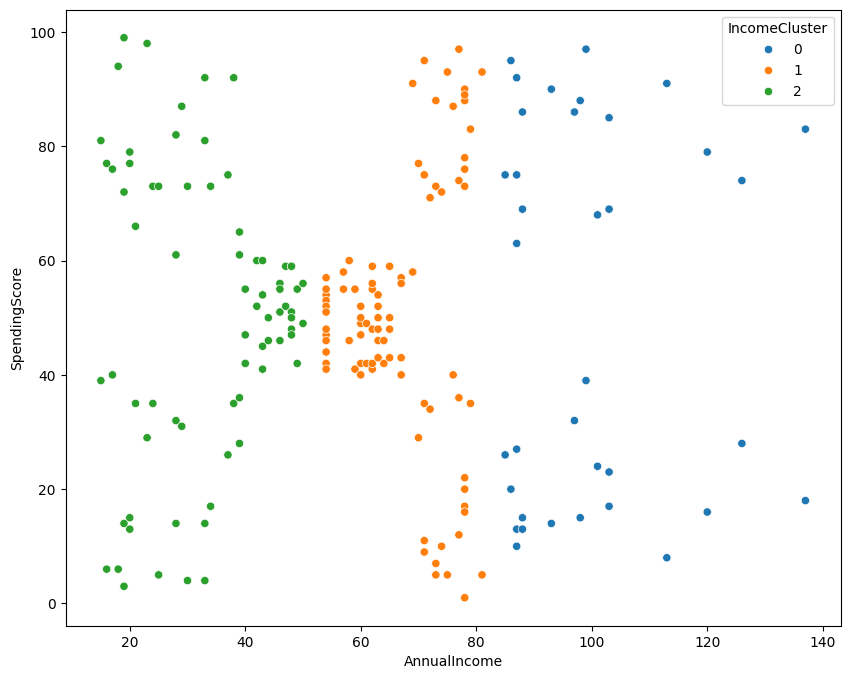

In [76]:
# univariate cluster plot
plt.figure(figsize=(10,8))
# plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='x')
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore',hue='IncomeCluster',palette='tab10')

#### Bivariate Clustering

In [77]:
df.columns

Index(['Gender', 'Age', 'AnnualIncome', 'SpendingScore', 'Income Cluster',
       'IncomeCluster'],
      dtype='object')

In [78]:
# bivariate
# using annual income and spending score
# optimal clusters will be determined after using the elbow method

In [79]:
clustering2 = KMeans()
clustering2.fit(df[['AnnualIncome','SpendingScore']])
df['Spending_IncomeCluster']=clustering2.labels_


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
# optimizing cluster
inertia_scores2 = []
for i in range(1,11):
    kmeans2 =  KMeans(n_clusters=i)
    kmeans2.fit(df[['AnnualIncome','SpendingScore']])
    inertia_scores2.append(kmeans2.inertia_)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

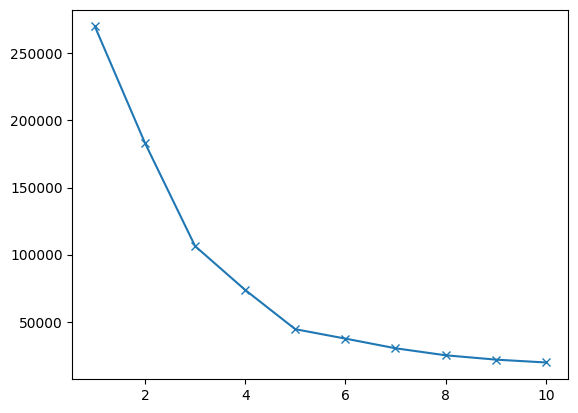

In [81]:
# elbow
plt.plot(range(1,11),inertia_scores2,marker='x')

In [82]:
# set n_clusters to 5. Honestly I want to use 4

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['AnnualIncome','SpendingScore']])
df['Spending_IncomeCluster']=clustering2.labels_

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,25.727273,79.363636
1,55.296296,49.518519
2,26.304348,20.913043
3,88.200000,17.114286
4,86.538462,82.128205


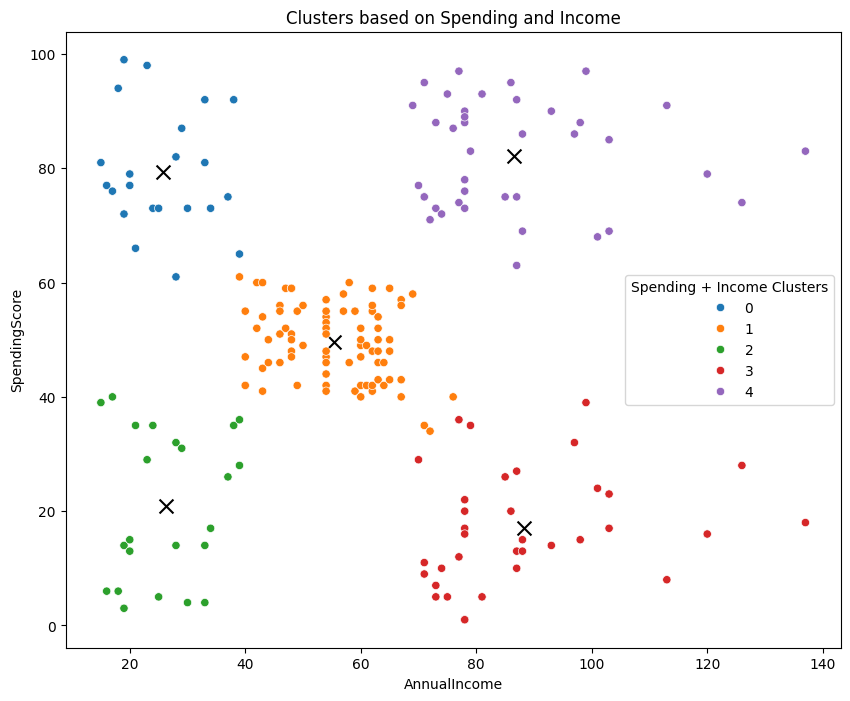

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='x')
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore',hue='Spending_IncomeCluster',palette='tab10')
plt.legend(title='Spending + Income Clusters')
plt.title('Clusters based on Spending and Income')
plt.show()

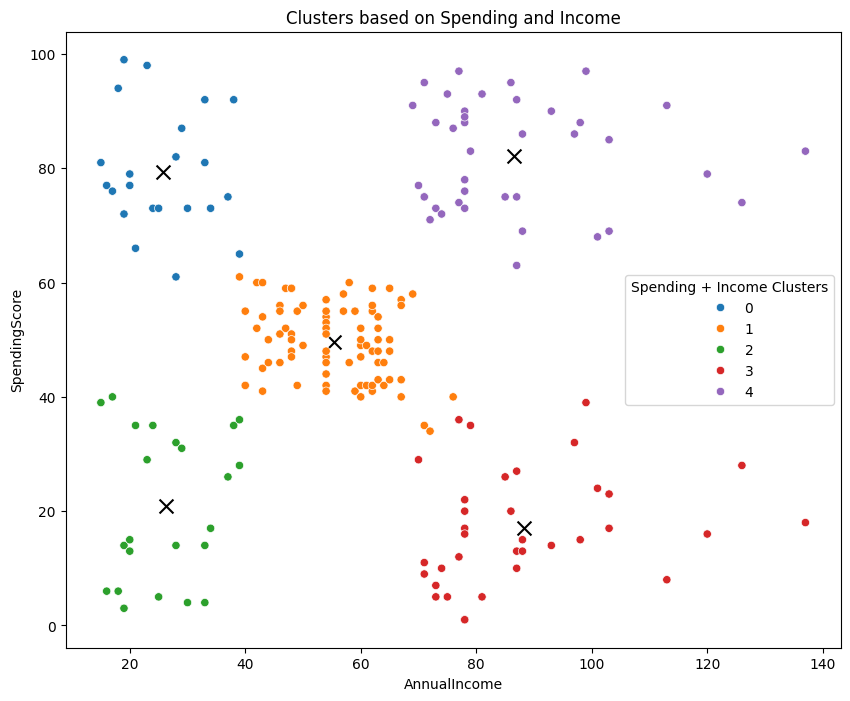

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='x')
sns.scatterplot(data=df,x='AnnualIncome',y='SpendingScore',hue='Spending_IncomeCluster',palette='tab10')
plt.legend(title='Spending + Income Clusters')
plt.title('Clusters based on Spending and Income')
plt.show()

#### Clustering based on Age and Spending Score

In [86]:
clustering3 = KMeans()
clustering3.fit(df[['Age','SpendingScore']])
df['Spending_AgeCluster']=clustering3.labels_

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

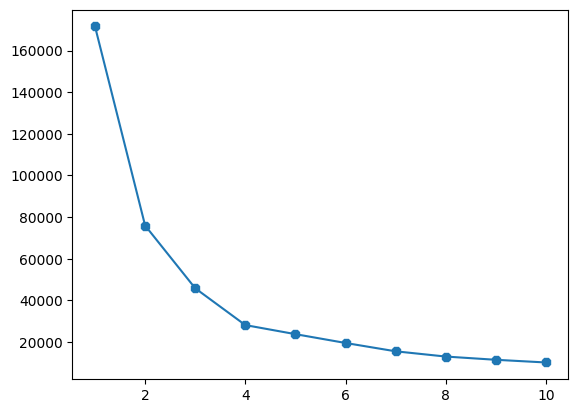

In [87]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 =  KMeans(n_clusters=i)
    kmeans3.fit(df[['Age','SpendingScore']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3,marker='8')

In [88]:
#optimizing after elbow method
clustering3 = KMeans(n_clusters=4)
clustering3.fit(df[['Age','SpendingScore']])
df['Spending_AgeCluster']=clustering3.labels_

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


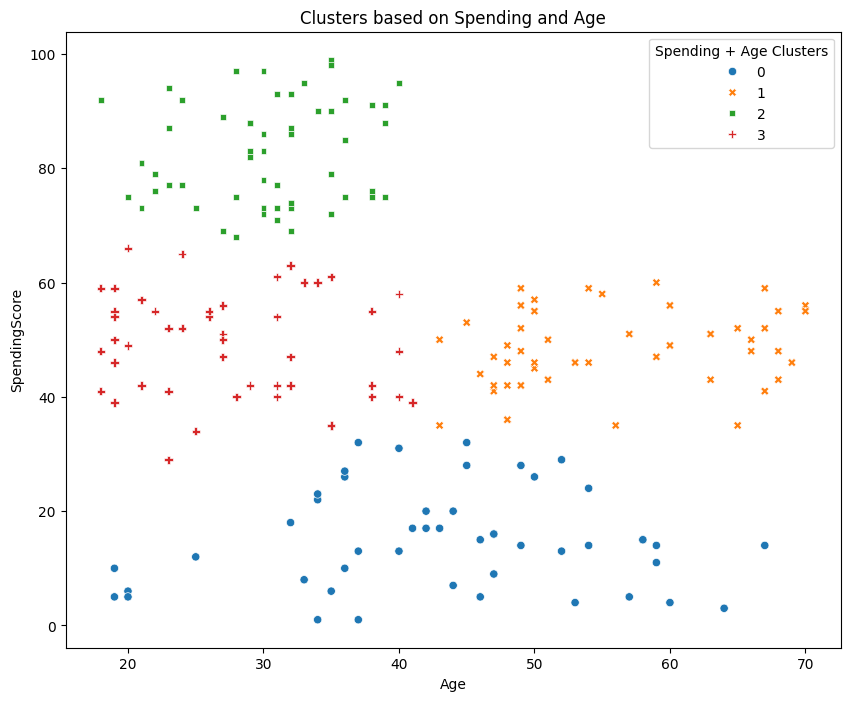

In [90]:
plt.figure(figsize=(10,8))
#plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='x')
sns.scatterplot(data=df,x='Age',y='SpendingScore',hue='Spending_AgeCluster',palette='tab10',style='Spending_AgeCluster')
plt.legend(title='Spending + Age Clusters')
plt.title('Clusters based on Spending and Age')
plt.show()